<a href="https://colab.research.google.com/github/PDDA-OPDU/MICP-Analytics/blob/main/Auto_Chicheng_GitHub/Panel_Bvocc_ver4_optimization_read_Chicheng_ver8_full_auto_GitHub.ipynb" 
    target="_parent"><img 
    src="https://colab.research.google.com/assets/colab-badge.svg" 
    alt="Open In Colab"/></a>

In [1]:
using_colab = True

In [2]:
if using_colab:


    !wget 'https://github.com/PDDA-OPDU/MICP-Analytics/raw/main/Auto_Chicheng_GitHub/CORE_DATA_AND_DESCRIPTIONS_DATABASE_HPMI.xlsx'
    #!wget 'https://github.com/Philliec459/Open-Source-Petrophysics/raw/main/photos.ZIP'

    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/STELLA_brief_ver2_backyard_grass_shoreline.ipynb
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_grass_shade_whiteshade.xlsx
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_FullSun.xlsx

    #!pip install altair
    #!pip install panel
    #!pip install pillow
    #!pip install jupyter_bokeh
    #!pip install altair_viewer
    #!pip install altair_transform
    !pip install scipy

    #!unzip photos


dyld[37318]: Library not loaded: /usr/local/opt/libunistring/lib/libunistring.2.dylib
  Referenced from: <6C399AFD-1783-33DE-B8D8-F154FD41D3AC> /usr/local/Cellar/wget/1.20.3_2/bin/wget
  Reason: tried: '/usr/local/opt/libunistring/lib/libunistring.2.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libunistring/lib/libunistring.2.dylib' (no such file), '/usr/local/opt/libunistring/lib/libunistring.2.dylib' (no such file), '/usr/local/lib/libunistring.2.dylib' (no such file), '/usr/lib/libunistring.2.dylib' (no such file, not in dyld cache), '/usr/local/Cellar/libunistring/1.2/lib/libunistring.2.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/Cellar/libunistring/1.2/lib/libunistring.2.dylib' (no such file), '/usr/local/Cellar/libunistring/1.2/lib/libunistring.2.dylib' (no such file), '/usr/local/lib/libunistring.2.dylib' (no such file), '/usr/lib/libunistring.2.dylib' (no such file, not in dyld cache)


# Gaussian Fit of HPMI data

## Load Python libraries

In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import panel as pn
#pn.extension('matplotlib')
#pn.extension()


pn.extension(comms='colab')

from scipy.optimize import minimize

import os


# Load Data

## The following cells will load the HPMI data from Chicheng's Thesis data for line of Batch 1, 2 or 3. Activate the cell for the Batch of data that you want to process. 

## 1) Load  row of HPMI data starting at row A12:A130 for Pc and xxx12 to xxx130 for Sw

In [4]:
# Function to convert a number to an Excel-style column letter (supports beyond Z)
def get_column_letter(n):
    result = ""
    while n > 0:
        n, remainder = divmod(n - 1, 26)
        result = chr(65 + remainder) + result
    return result

# Specify the file path and sheet number
file_path = 'CORE_DATA_AND_DESCRIPTIONS_DATABASE_HPMI.xlsx'
sheet_number = 0  # Second sheet, as pandas uses zero-indexing

# Read the Pc values (same for all samples)
pc_values = pd.read_excel(file_path, sheet_name=sheet_number, usecols="A", skiprows=11, nrows=119)

# Initialize a dictionary to store data for each sample
data_dict = {}

# Loop through each sample (from column B onward)
# Adjust the range according to the number of samples we need to process
for sample_num in range(1, 36):  # Example for 51 samples, adjust as necessary
    column_letter = get_column_letter(sample_num + 1)  # +1 because 'B' is column 2
    #print(f"Processing sample {sample_num} (Column {column_letter})")

    # Read Sw values for the current sample
    sw_values = pd.read_excel(file_path, sheet_name=sheet_number, usecols=column_letter, skiprows=11, nrows=119)
    
    # Read Porosity for the current sample (assumed to be in row 8)
    porosity = pd.read_excel(file_path, sheet_name=sheet_number, usecols=column_letter, skiprows=7, nrows=1).iloc[0, 0]
    
    # Read Permeability for the current sample (assumed to be in row 9)
    permeability = pd.read_excel(file_path, sheet_name=sheet_number, usecols=column_letter, skiprows=8, nrows=1).iloc[0, 0]

    # Read Num of Pore systems for the current sample (assumed to be in row 10)
    Num_pore_sys = pd.read_excel(file_path, sheet_name=sheet_number, usecols=column_letter, skiprows=9, nrows=1).iloc[0, 0]
    #print(Num_pore_sys)

    # Store the data in the dictionary
    data_dict[f'Sample_{sample_num}'] = {
        'Pc': pc_values.values.flatten(),
        'Sw': sw_values.values.flatten(),
        'Porosity (%)': porosity,
        'Permeability': permeability,
        'Num_pore_sys': Num_pore_sys,
    }

# Now, data_dict contains the data for all samples, structured for easy access
#print(data_dict)

# Batch 1, 2, or 3 from the spreadsheet
Pc_batch = 1


# Auto





Final minimized error (MSE): 0.1451808257964147


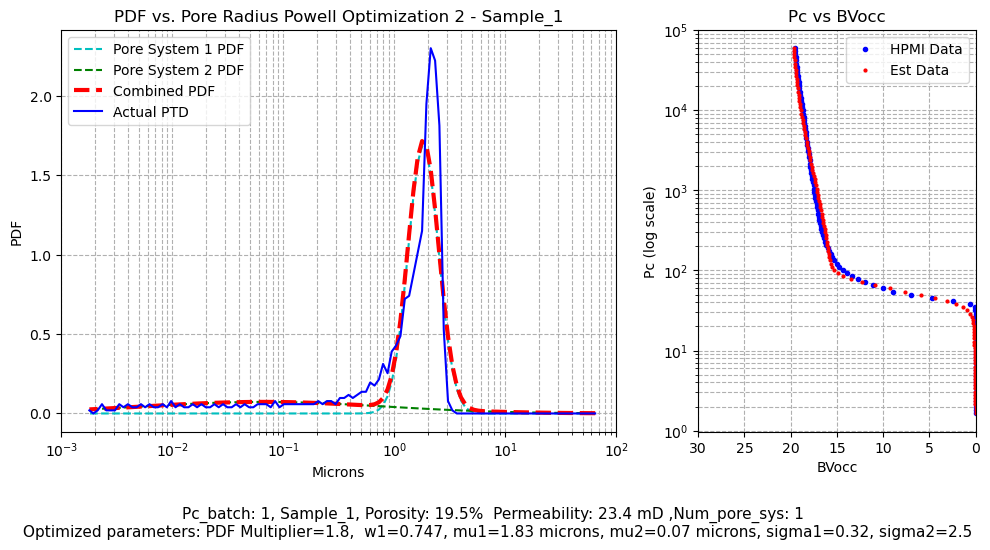





Final minimized error (MSE): 0.043039999926899795


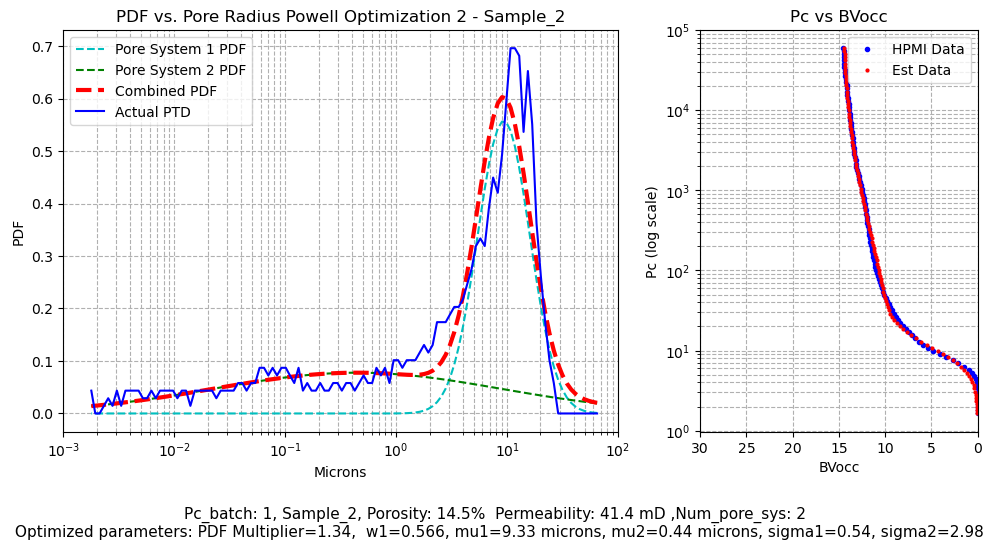





Final minimized error (MSE): 0.030572217284127737


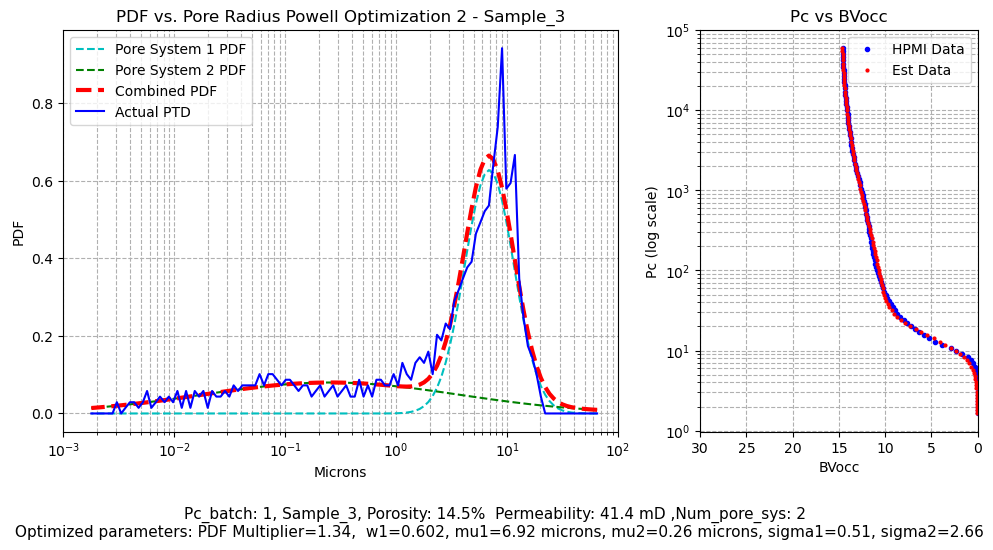





Final minimized error (MSE): 0.020208902189432967


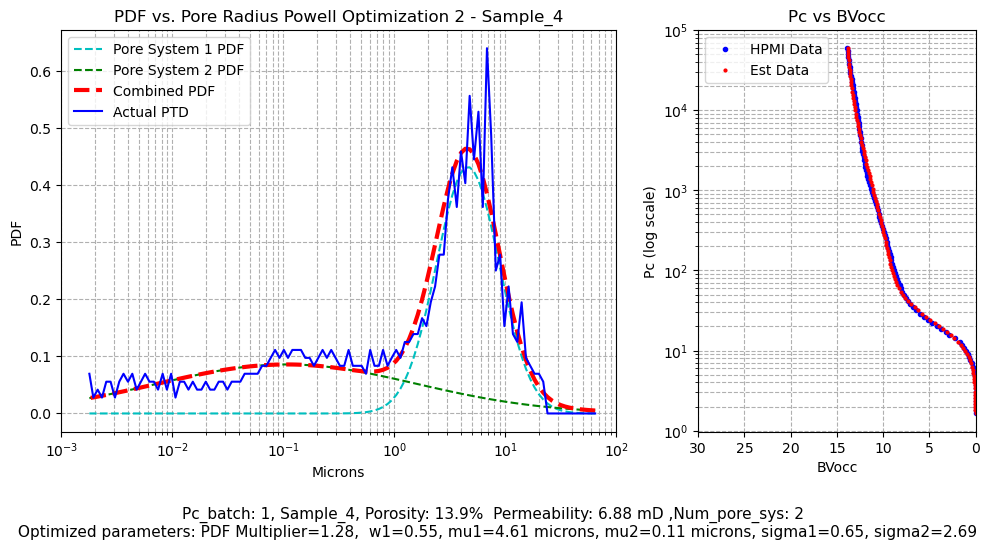





Final minimized error (MSE): 0.020513283681614546


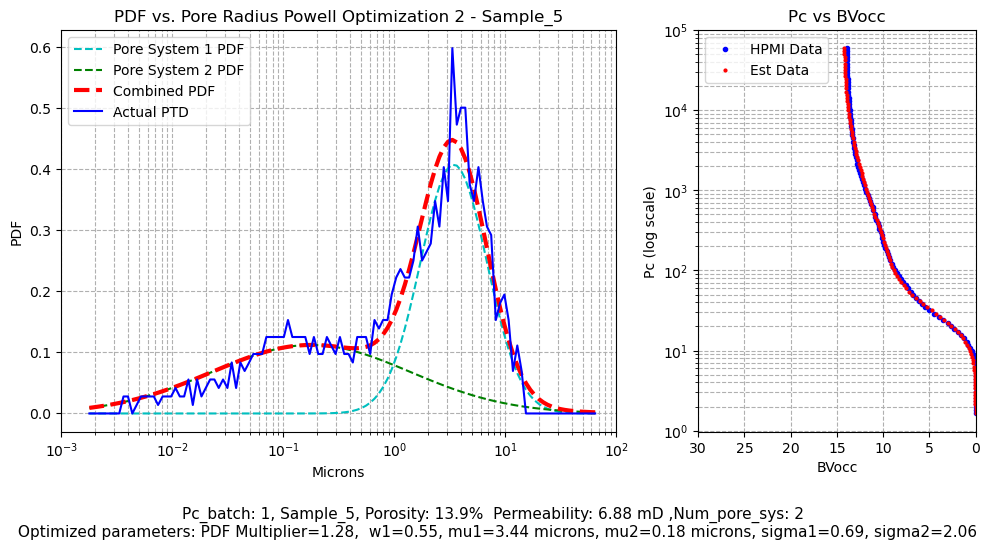





Final minimized error (MSE): 0.01574631684150206


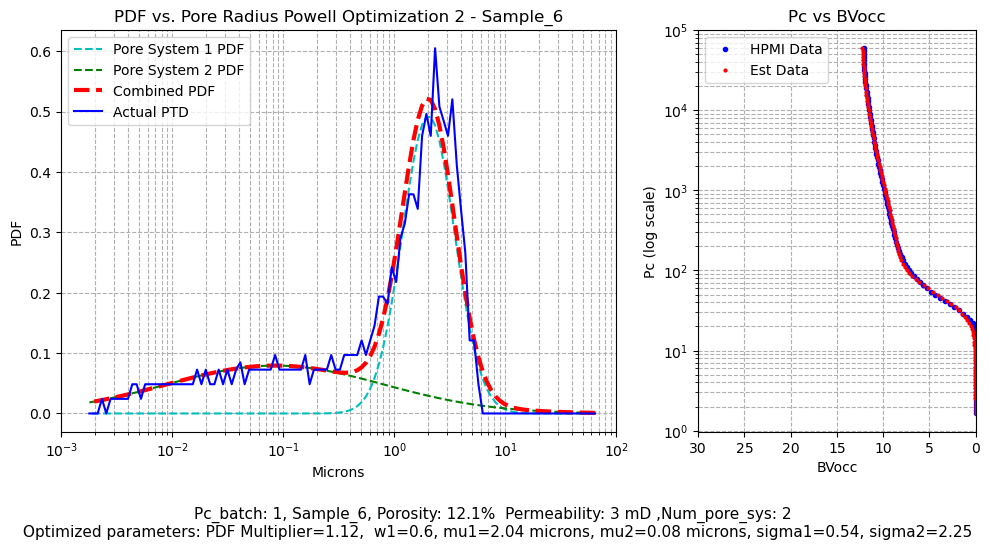





Final minimized error (MSE): 0.09371621342532611


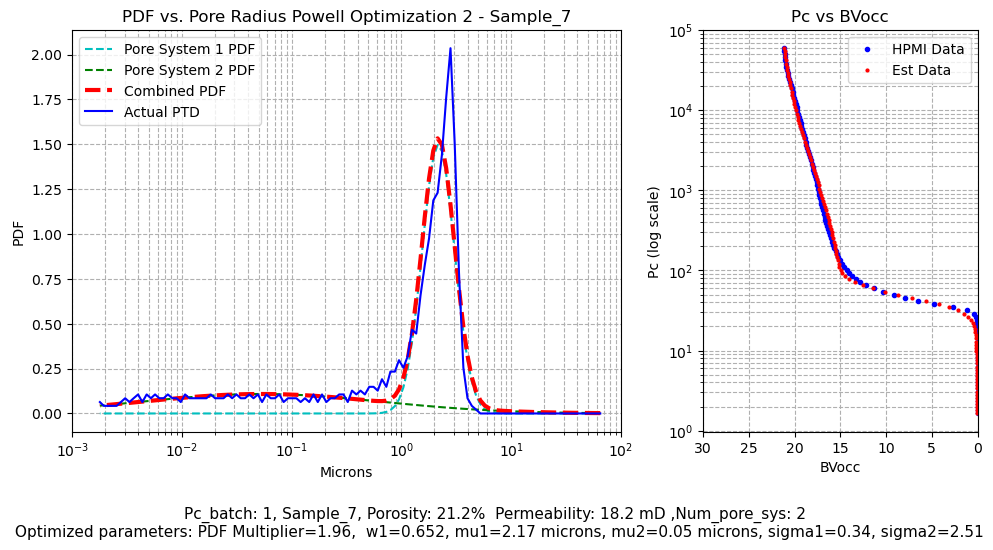





Final minimized error (MSE): 0.2389509035528416


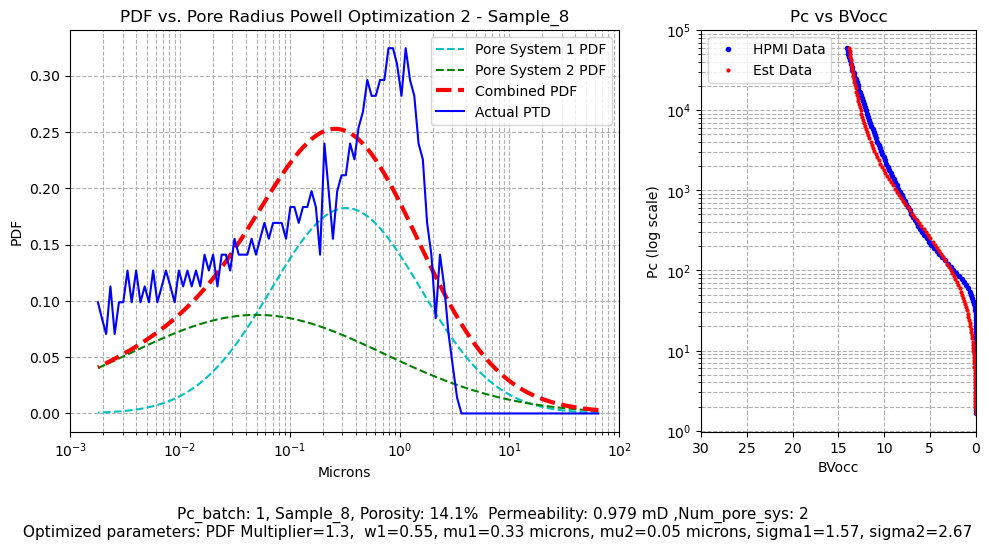





Final minimized error (MSE): 0.07058434774217359


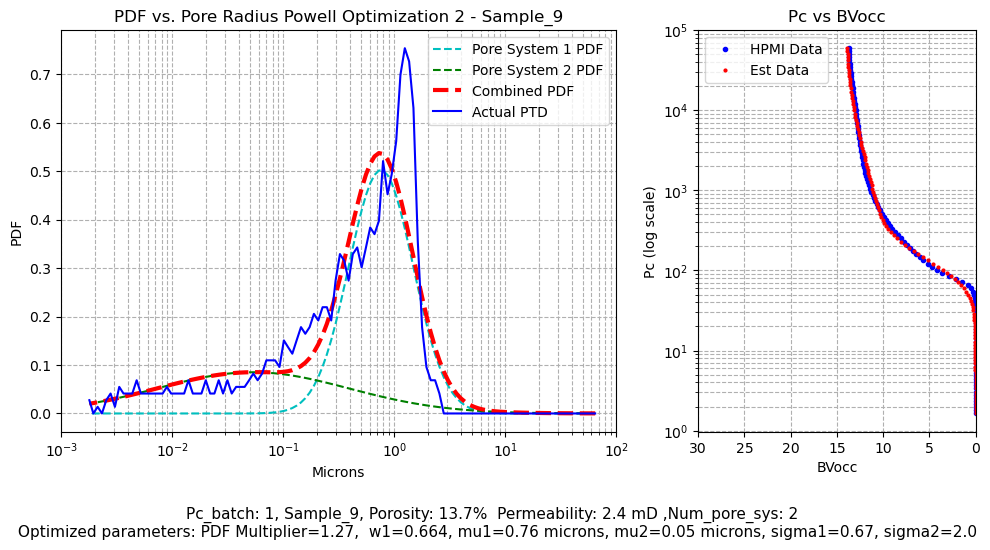





Final minimized error (MSE): 0.12356893978160823


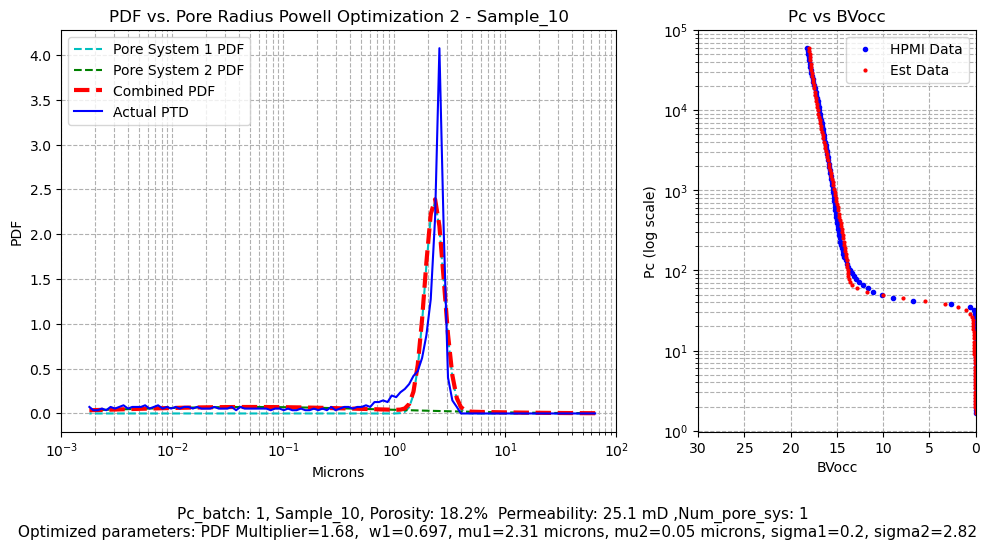





Final minimized error (MSE): 0.13911774178199585


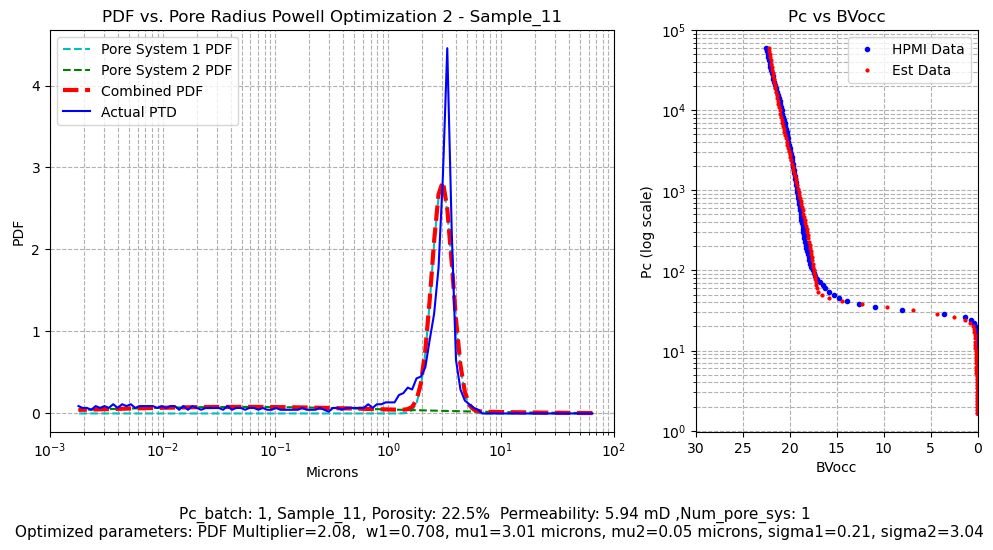





Final minimized error (MSE): 0.17439917787893758


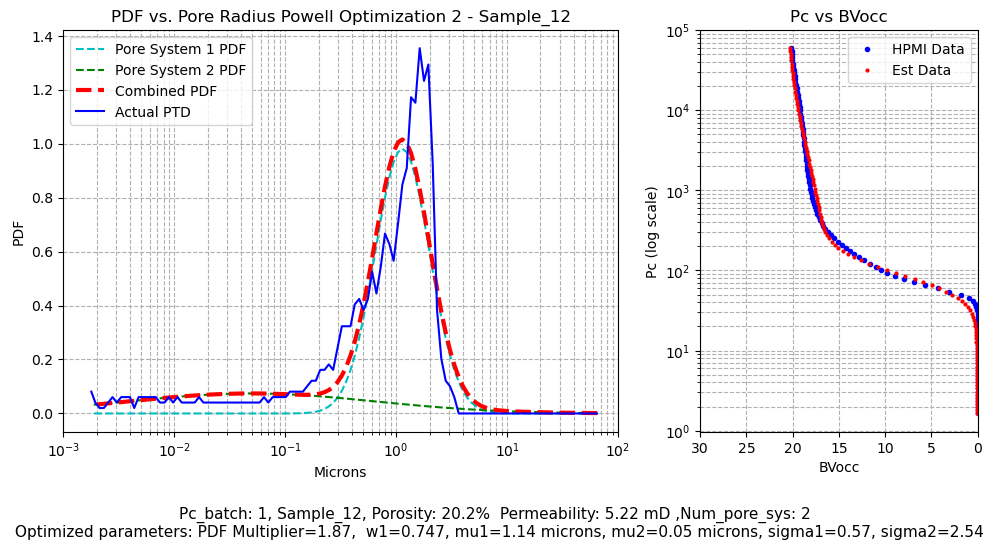





Final minimized error (MSE): 0.11913814167869805


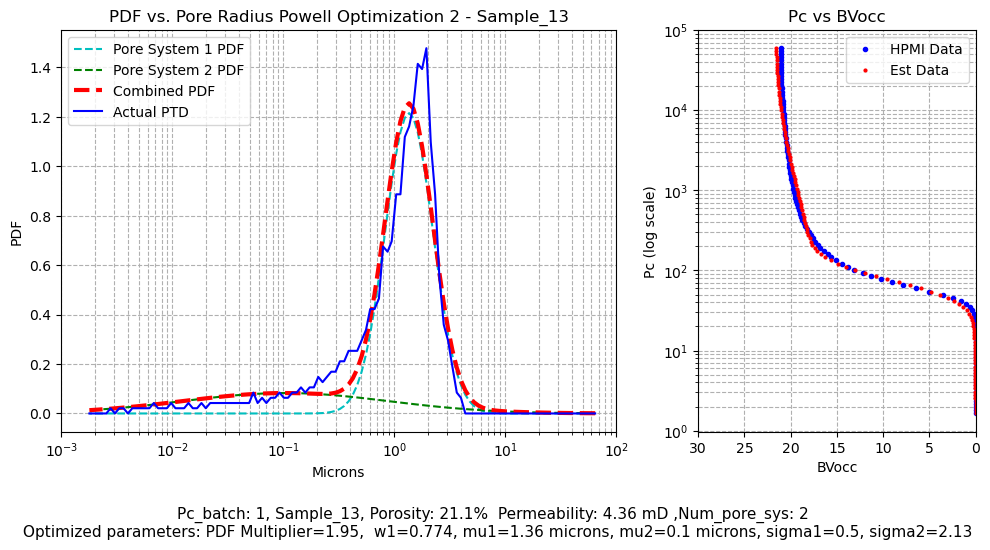





Final minimized error (MSE): 0.12931282069873684


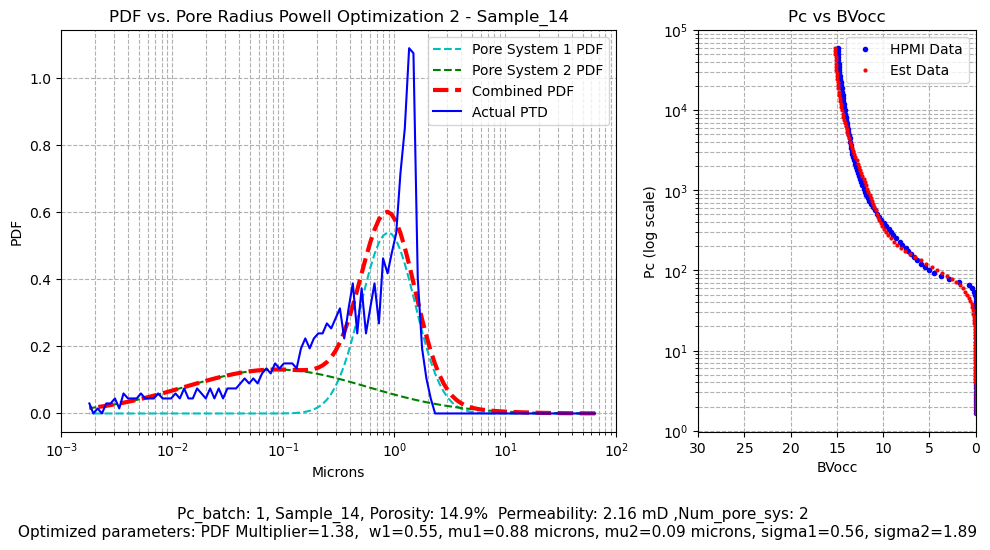





Final minimized error (MSE): 0.11984943751966468


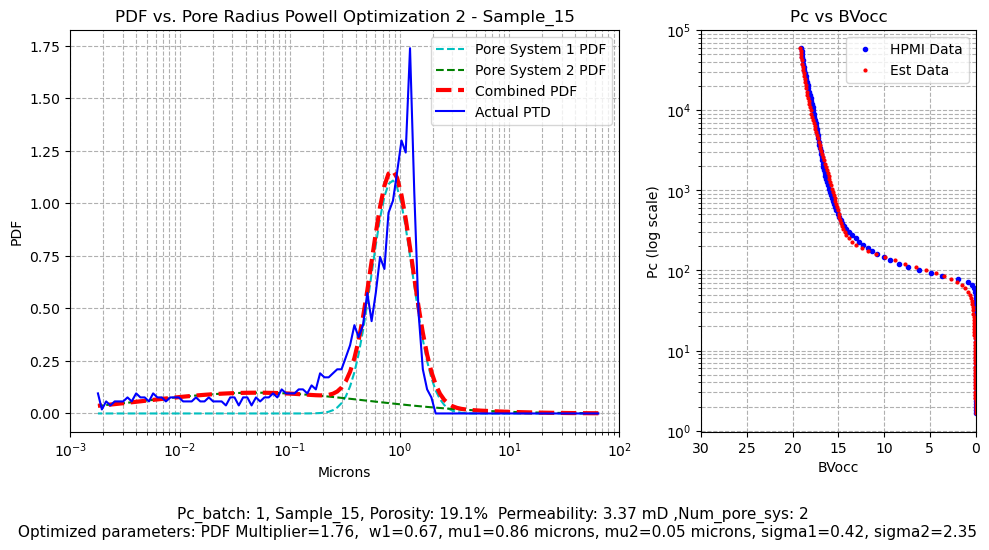





Final minimized error (MSE): 0.07664977139989161


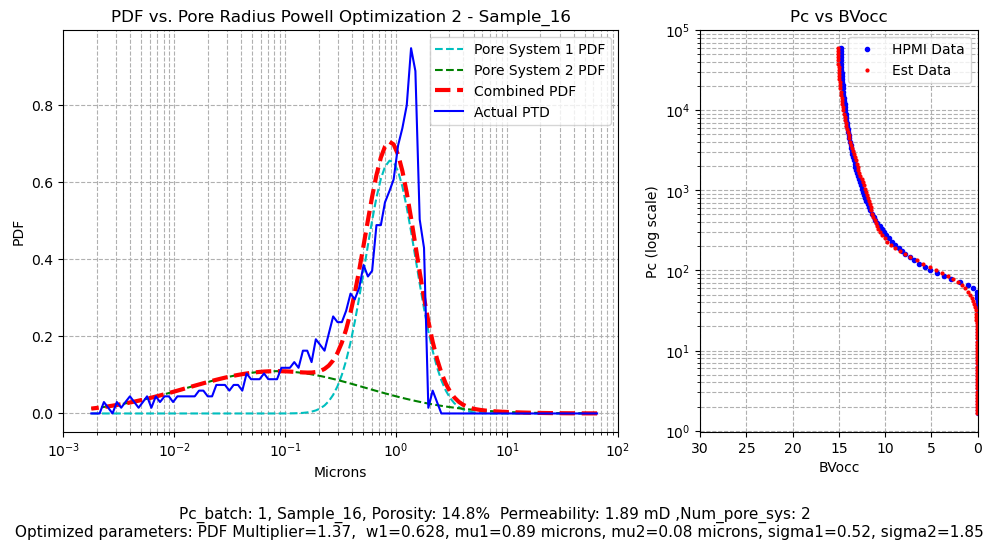





Final minimized error (MSE): 0.05074846543103123


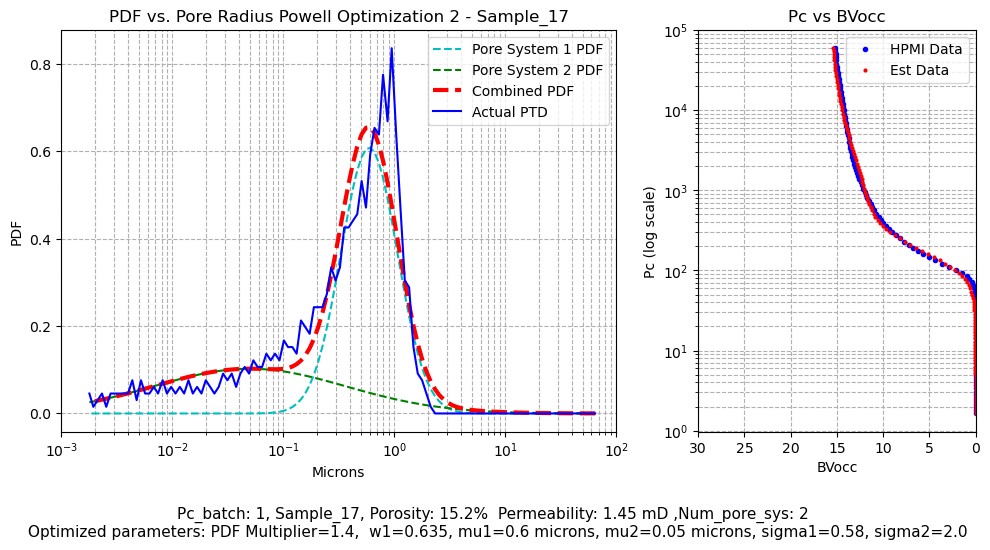





Final minimized error (MSE): 0.09727147954639753


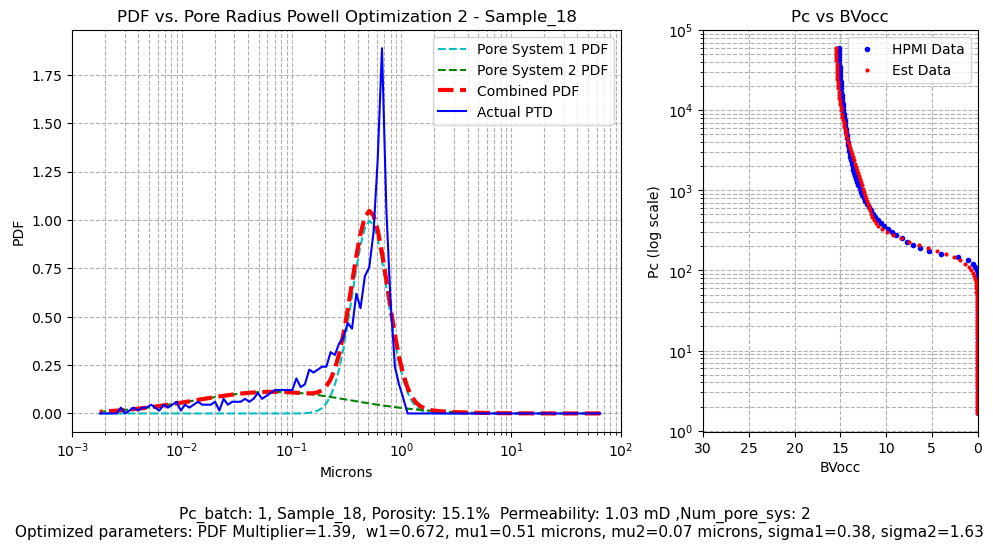





Final minimized error (MSE): 0.015758947210017922


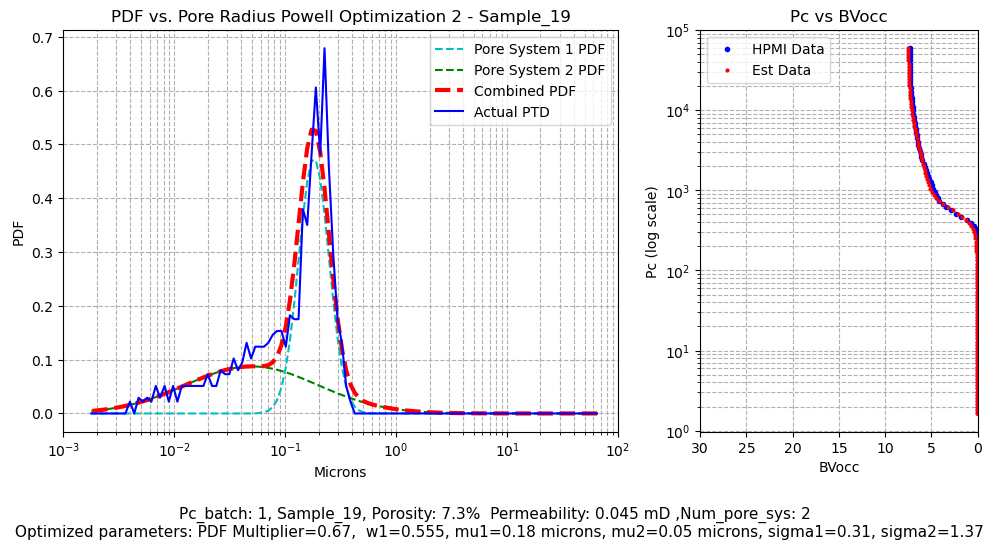





Final minimized error (MSE): 0.006724563872432616


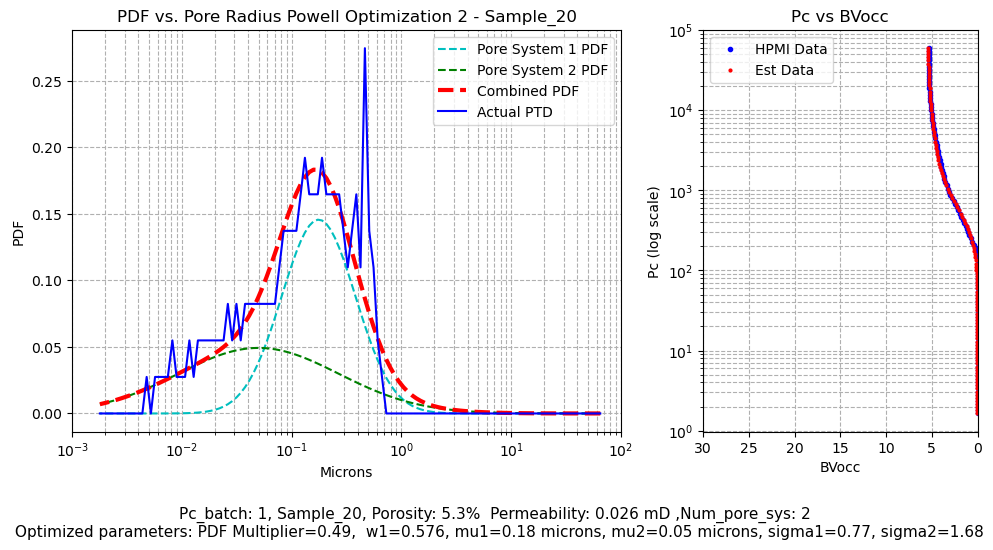





Final minimized error (MSE): 0.019168791346362683


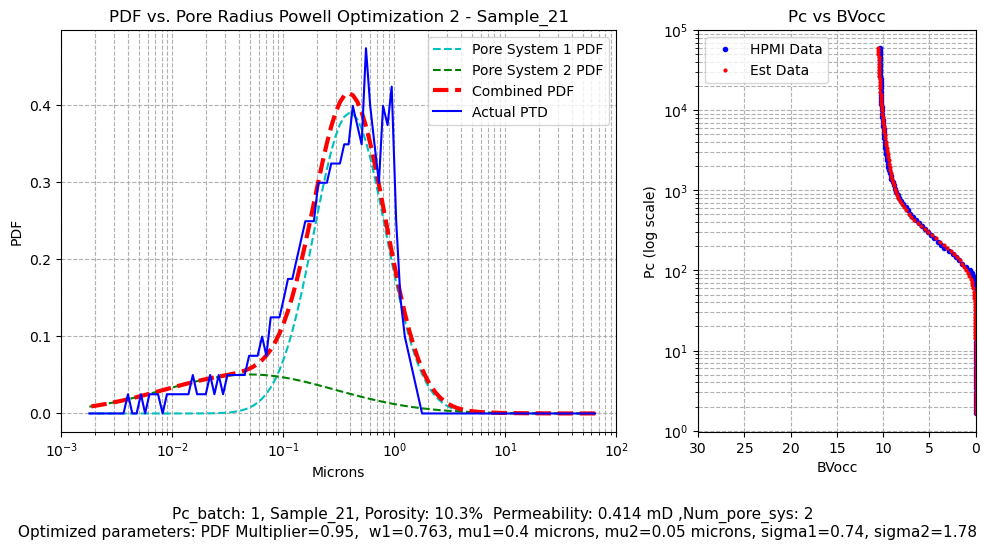





Final minimized error (MSE): 0.01895491274513747


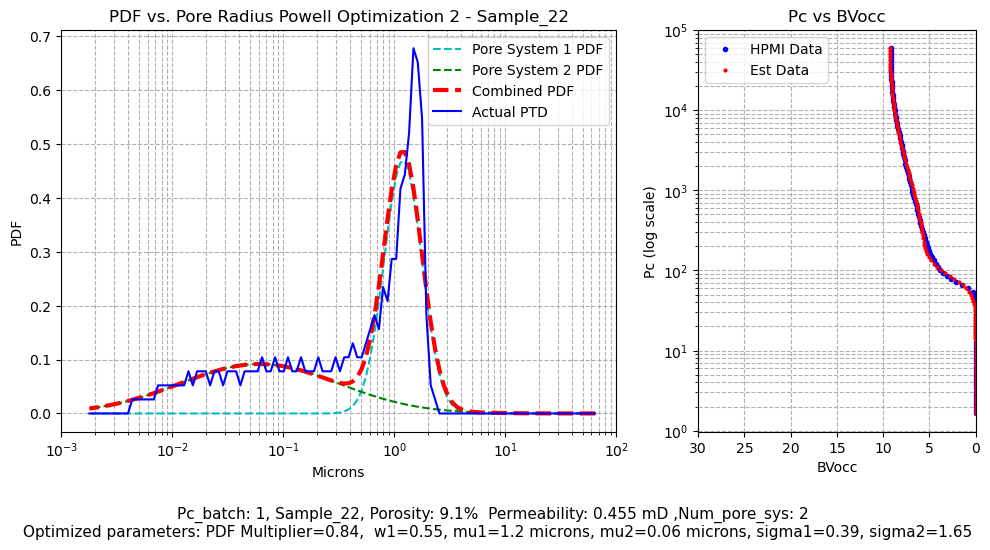





Final minimized error (MSE): 0.05602898302942363


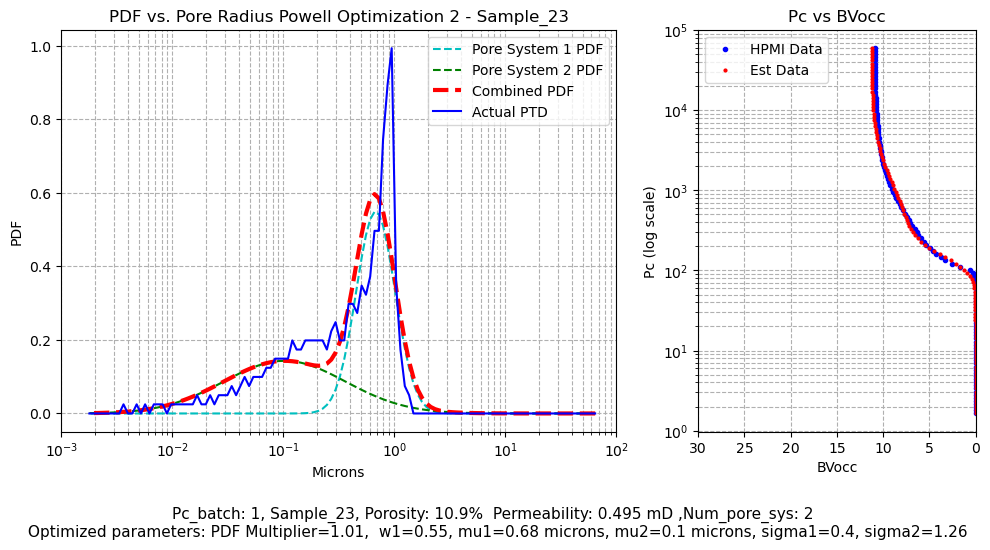





Final minimized error (MSE): 0.011492184943067682


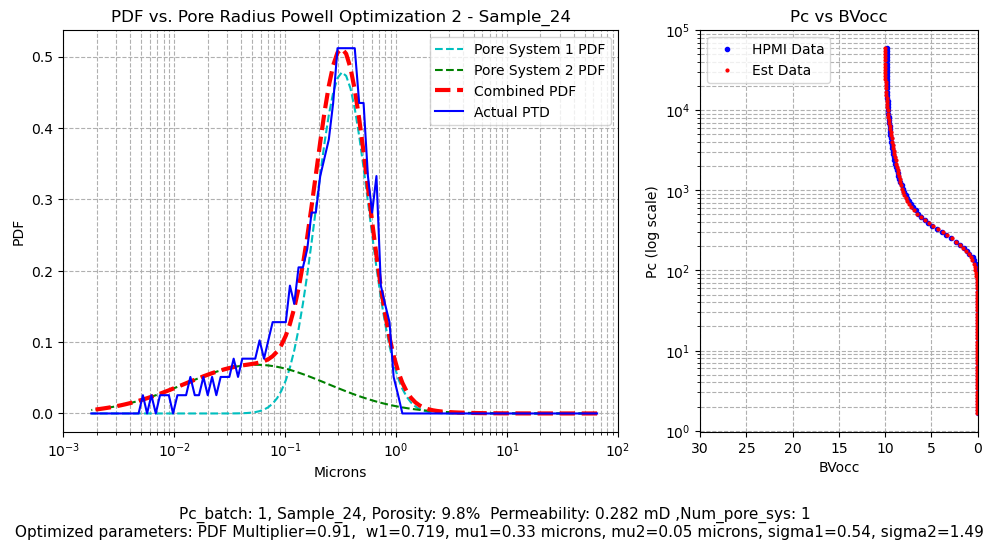





Final minimized error (MSE): 0.04876181892022095


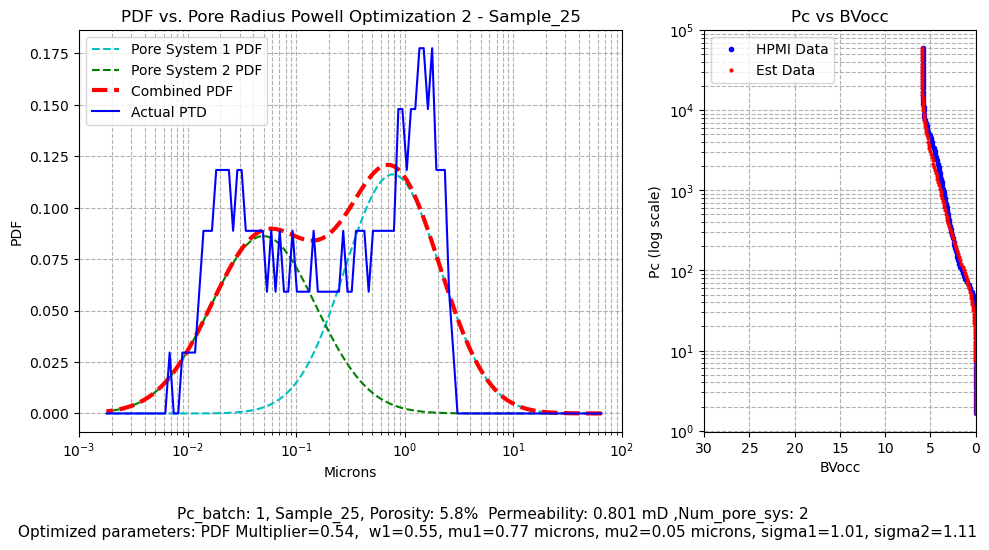





Final minimized error (MSE): 0.011281831930428969


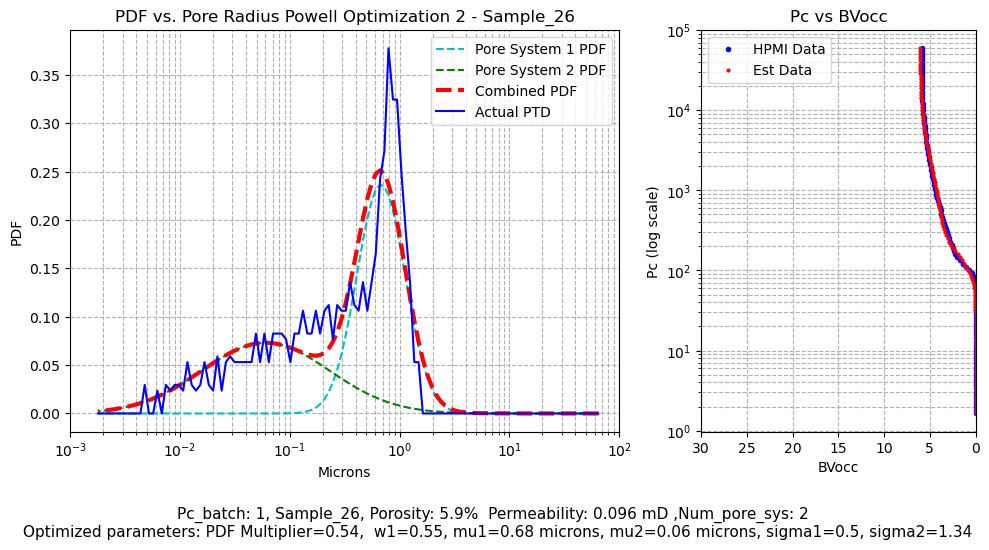





Final minimized error (MSE): 0.03539970976704252


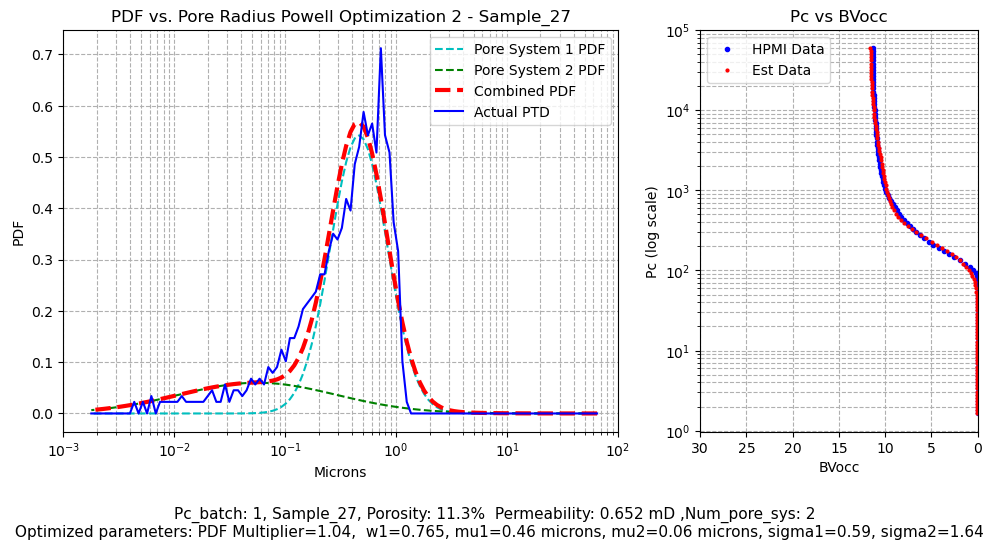





Final minimized error (MSE): 0.04392619050008559


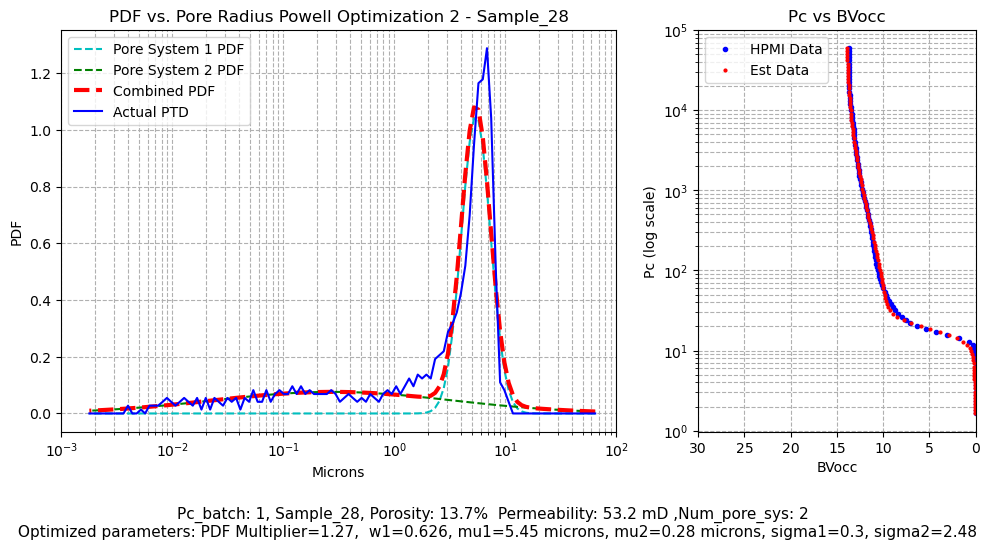





Final minimized error (MSE): 0.03232571531484892


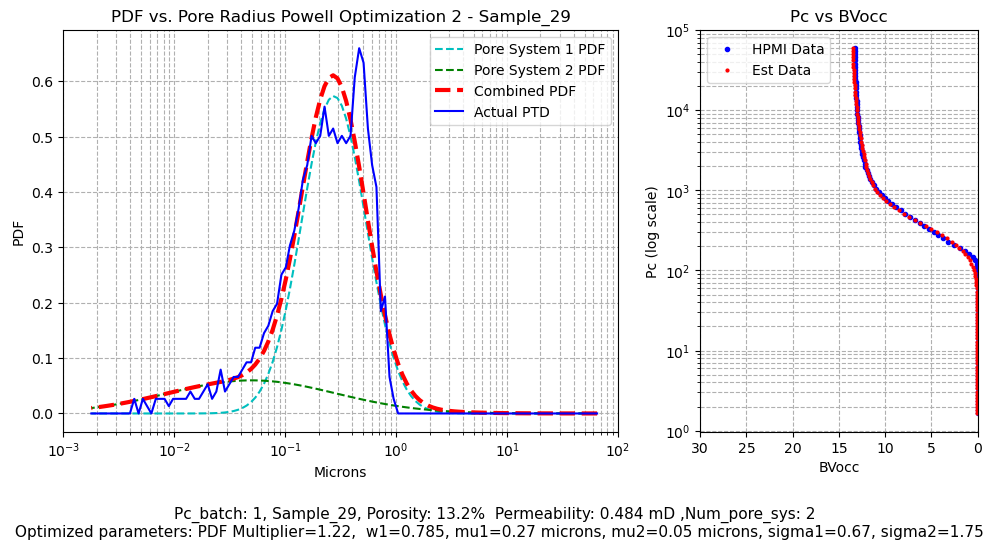





Final minimized error (MSE): 0.0356924052877722


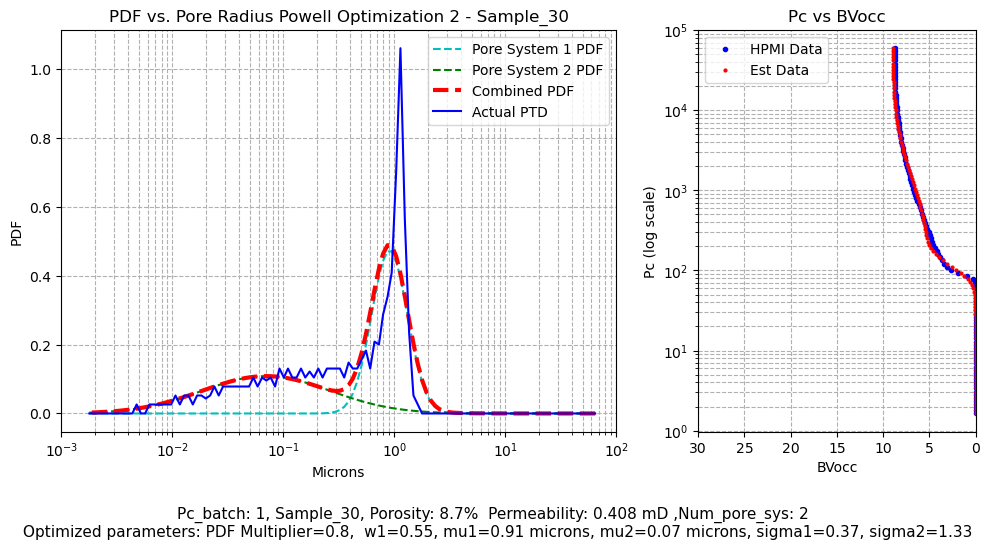





Final minimized error (MSE): 0.08703068424127684


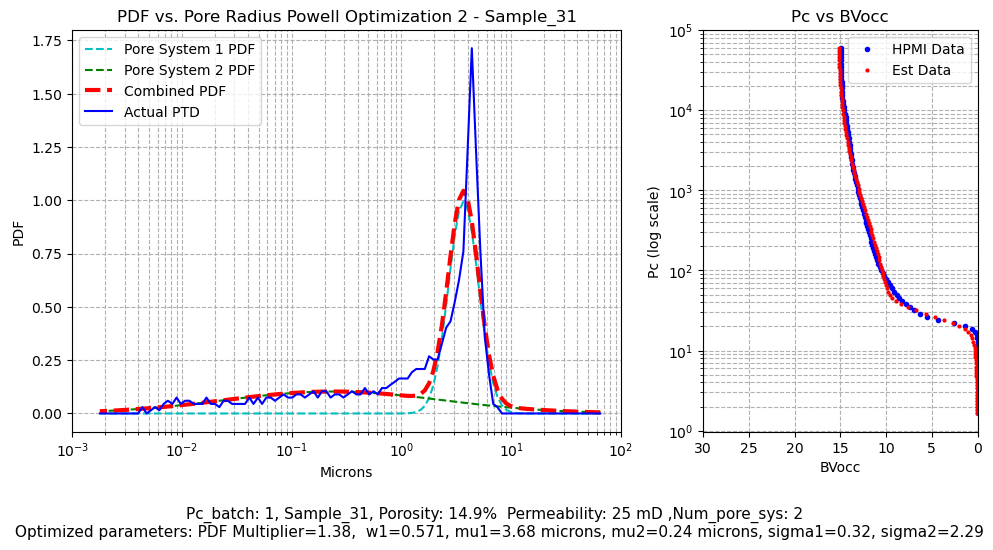





Final minimized error (MSE): 0.009791716734697411


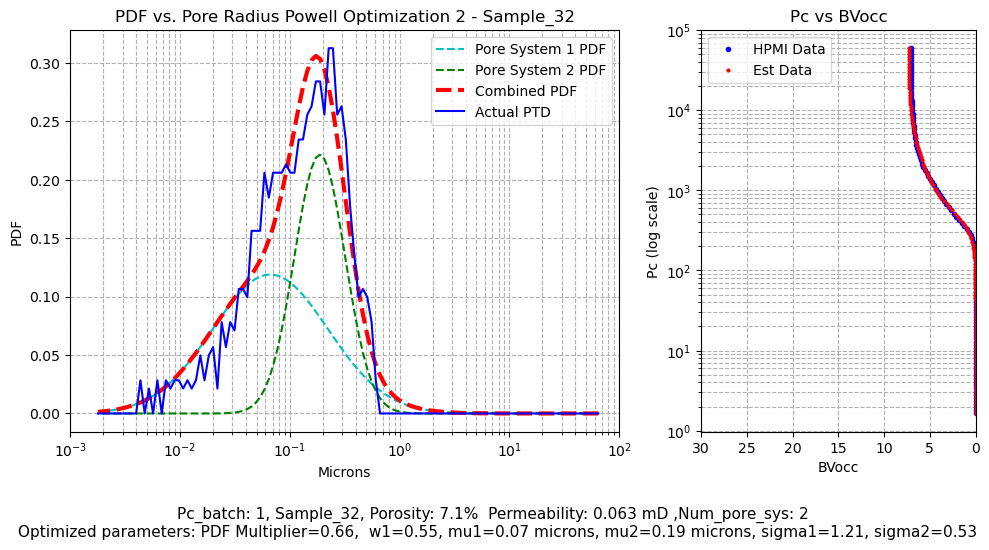





Final minimized error (MSE): 0.023258607343571557


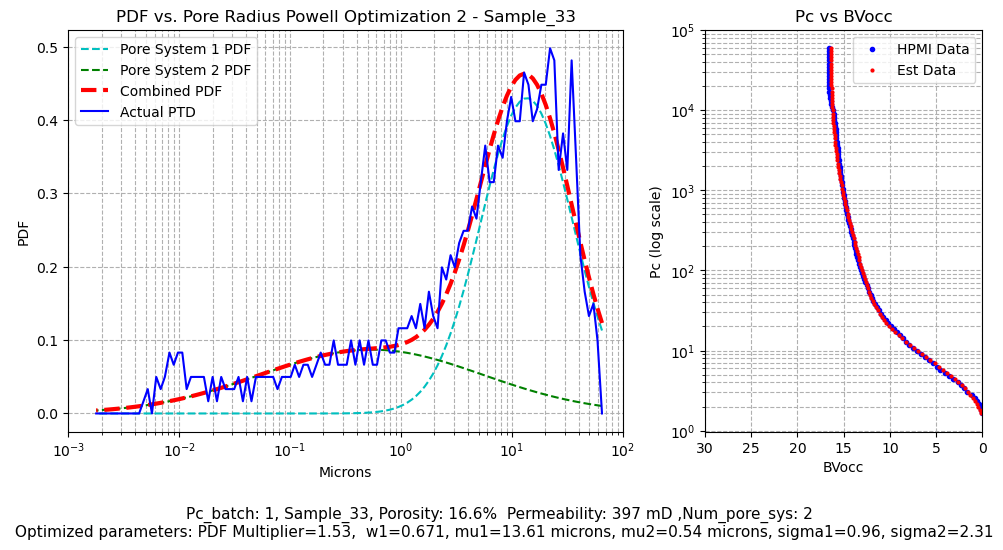





Final minimized error (MSE): 0.12211843805815369


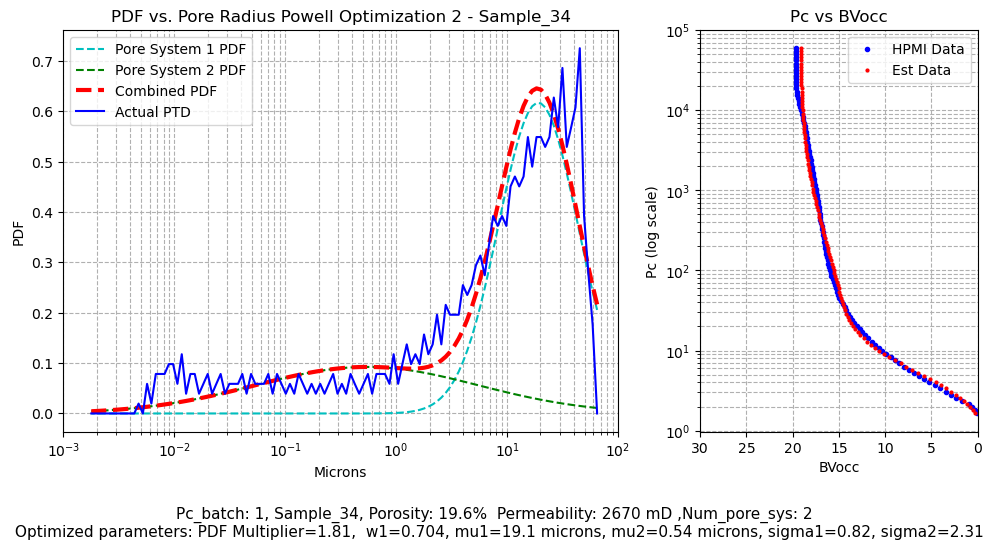





Final minimized error (MSE): 0.028791319517723183


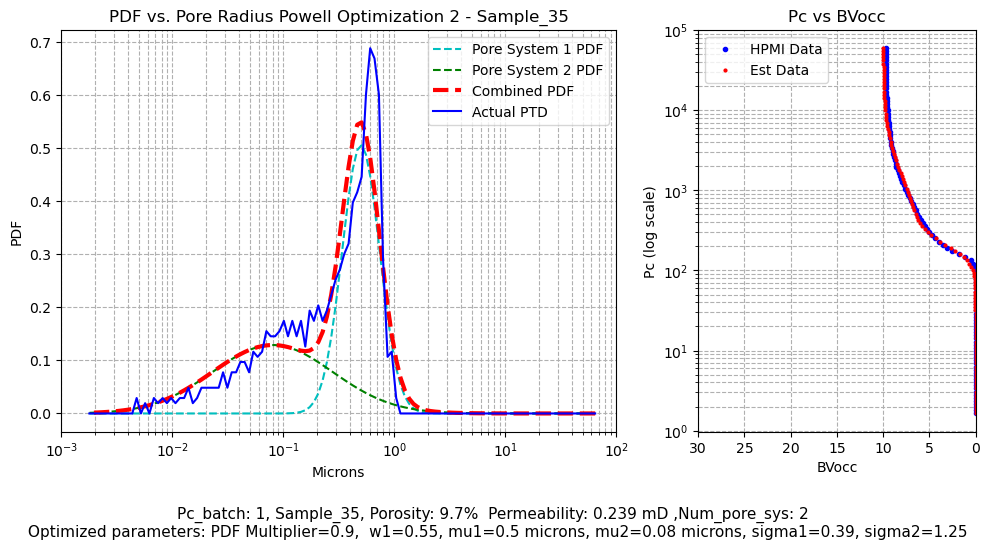

In [5]:


# Loop through all samples
for Sample in data_dict.keys():
    sample_data = data_dict[Sample]

    porosity_sample = sample_data['Porosity (%)']
    perm_sample = sample_data['Permeability']
    Num_pore_sys = sample_data['Num_pore_sys']


    Pc = sample_data['Pc']
    Sw = sample_data['Sw']
    BVocc = ((100 - Sw) / 100) * porosity_sample

    dbvocc = np.diff(BVocc)  # diff of BVocc for distribution, but lose one element in the array
    dbvocc = np.insert(dbvocc, 0, 0)  # Our final dbvocc after adding a zero at the start


    #pore_systems = 2

    # Calculate the PDF normalization parameter mul
    def mul():
        w1       =  1
        mu1      = np.log(10)
        mu2      = np.log(1)
        sigma1   = 1
        sigma2   = 1
    
    
        ## x_values are from 212 to 0.5, so x_values were flipped so now between 0.5 and 212#
        #BV2 = np.max(BVocc)/scale - BV1

        '''if Num_pore_sys == 2:
            w2 = 1 - w1
            
        if Num_pore_sys == 1:
            w1 = 1
            w2 = 0'''

        w2 = 1 - w1
    
        # Generate x-values on a log scale (must be positive)
        #x_values = np.logspace(-2, 3, 100)
        x_values = np.flipud((2*367)/(Pc*69035)*10**4)
    
        #print('x_values',x_values)                # High to low from any Pc values
        #print('len(x_values)',len(x_values) )
    
    
        ## PDF is a lognormal distribution function based on Gaussian parameters:
    
        '''
          PDF is a distribution
        '''
        # Calculate the PDF for log-normal distribution 1
        pdf1 = w1 * (1 / (sigma1 * np.sqrt(2 * np.pi))) * \
               np.exp(- (np.log(x_values) - mu1)**2 / (2 * sigma1**2))
    
        # Calculate the PDF for log-normal distribution 2
        pdf2 = w2 * (1 / (sigma2 * np.sqrt(2 * np.pi))) * \
               np.exp(- (np.log(x_values) - mu2)**2 / (2 * sigma2**2))
    
    
        # Combine PDFs
        combined_pdf = (pdf1 + pdf2)
        #print('combined_pdf',combined_pdf)
    
    
        ## Cum Sum of the combined_pdf distribution to create BV_new. Check the max value of this pdf:
        BV_new = np.cumsum(np.flipud(combined_pdf))
    
        ## The Max of BVocc is porosity or 26.15 in this instance. The max of test is around 9.
        #print()
        #print('Max of BVocc', np.max(BVocc))
        #print('Max of BV_new',np.max(BV_new))
    
        mul = np.max(BVocc)/np.max(BV_new)
    
        #print('mul = max BVocc / max BV_new =',mul)
    
        return mul
    
    #mul = 0.0924 * porosity_sample + 0.0002
    mul=mul()
    
    # Model function (unchanged)
    def model_function(w1, mu1, mu2, sigma1, sigma2):
        
        '''if Num_pore_sys == 2:
            w2 = 1 - w1
        if Num_pore_sys == 1:
            w1 = 1
            w2 = 0'''

        w2 = 1 - w1
        
        # Generate x-values for pore throat radii on a log scale
        x_values = ((2 * 367) / (Pc * 69035) * 10**4)

        # Calculate the PDFs for log-normal distributions
        pdf1 = mul * w1 * (1 / (sigma1 * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x_values) - mu1)**2 / (2 * sigma1**2))
        pdf2 = mul * w2 * (1 / (sigma2 * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x_values) - mu2)**2 / (2 * sigma2**2))

        # Combine PDFs
        combined_pdf = pdf1 + pdf2

        # Sum up this distribution for a Pc curve
        BV_new = np.cumsum(combined_pdf)

        # Create the plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [2, 1]})

        # Plot PDF with reversed axes
        ax1.plot(x_values, pdf1, 'c--', label='Pore System 1 PDF')
        ax1.plot(x_values, pdf2, 'g--', label='Pore System 2 PDF')
        ax1.plot(x_values, combined_pdf, 'r--', label='Combined PDF', lw=3)
        ax1.plot(x_values, dbvocc, 'b-', label='Actual PTD')
        ax1.set_yscale('linear')
        ax1.set_xscale('log')
        ax1.set_xlim(0.001, 100)
        ax1.set_xlabel('Microns')
        ax1.set_ylabel('PDF')
        ax1.set_title(f'PDF vs. Pore Radius Powell Optimization 2 - {Sample}')
        ax1.grid(True, which="both", ls="--")
        ax1.legend()

        # Add the text below the plot
        text_string = (f'Pc_batch: {Pc_batch}, {Sample}, Porosity: {porosity_sample}% '
                       f' Permeability: {perm_sample} mD ,Num_pore_sys: {Num_pore_sys} \n '
                       f'Optimized parameters: PDF Multiplier={round(mul, 2)},  w1={round(w1_opt, 3)}, '
                       f'mu1={round(np.exp(mu1_opt), 2)} microns, mu2={round(np.exp(mu2_opt), 2)} microns, '
                       f'sigma1={round(sigma1_opt, 2)}, sigma2={round(sigma2_opt, 2)}')

        # Adjust the position of the text as needed
        plt.figtext(0.5, -0.08, text_string, ha="center", fontsize=11, wrap=True)

        # Plot the actual data with markers only
        ax2.semilogy(BVocc, Pc, 'bo', markersize=3, label='HPMI Data')
        ax2.semilogy(BV_new, Pc, 'ro', markersize=2, label='Est Data')
        ax2.set_yscale('log')
        ax2.set_xlim(30, 0)
        ax2.set_title('Pc vs BVocc')
        ax2.set_ylabel('Pc (log scale)')
        ax2.set_xlabel('BVocc')
        ax2.grid(True, which="both", ls="--")
        ax2.legend()


        '''
        # Define the subdirectory where you want to save the plots
        output_dir = 'Plots'
        os.makedirs(output_dir, exist_ok=True)

        # Save the plot with a custom filename in the Plots subdirectory
        filename = os.path.join(output_dir, f'Plot_Pc_Batch{Pc_batch}_{Sample}_Optimize_Method2.png')
        plt.savefig(filename, bbox_inches='tight')'''
        
        plt.tight_layout()
        # Display the plot
        plt.show()
        #plt.close()

        return fig

    # Objective function (unchanged)
    def objective_function(params, Pc, BVocc, dbvocc):
        w1, mu1, mu2, sigma1, sigma2 = params

        '''if Num_pore_sys == 2:
            w2 = 1 - w1
            
        if Num_pore_sys == 1:
            w1 = 1
            w2 = 0'''

        w2 = 1 - w1
        
        x_values = ((2 * 367) / (Pc * 69035) * 10**4)

        pdf1 = mul * w1 * (1 / (sigma1 * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x_values) - mu1)**2 / (2 * sigma1**2))
        pdf2 = mul * w2 * (1 / (sigma2 * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x_values) - mu2)**2 / (2 * sigma2**2))

        combined_pdf = pdf1 + pdf2
        BV_new = np.cumsum(combined_pdf)

        # Normalize the BVocc and BV_new to avoid scale issues
        BVocc_normalized = BVocc / np.max(BVocc)
        BV_new_normalized = BV_new / np.max(BV_new)

        # Calculate the error (mean squared error) between the actual and estimated data
        ############error = np.mean((BVocc_normalized - BV_new_normalized)**2)
        error = np.mean((BVocc - BV_new)**2)

        return error

    
    # Initial guess for optimization
    #initial_guess = [0.7, np.log(6), np.log(0.1), 0.9, 0.7]  # w1, mu1, mu2, sigma1, sigma2
    # Adjust the initial guess to favor w1 as the dominant pore system
    initial_guess = [0.85, np.log(6), np.log(0.1), 0.9, 0.7]  # w1 starts high to dominate
    

    # Adjust bounds to favor w1
    bounds = [
        (0.55, 1),         # w1 is constrained to be dominant (closer to 1)
        (-3, 6),           # mu1
        (-3, 6),           # mu2
        (0.1, 4),          # sigma1
        (0.1, 4)           # sigma2
    ]


    # Perform the optimization with Powell method (unchanged)
    result = minimize(objective_function, initial_guess, args=(Pc, BVocc, dbvocc), method='Powell', bounds=bounds)


    print()
    print()
    print()
    print()
    minimized_error = result.fun
    print(f"Final minimized error (MSE): {minimized_error}")
    error_threshold = 0.75  # Define an appropriate threshold
    

    
    # Extract optimized parameters
    optimized_params = result.x
    w1_opt, mu1_opt, mu2_opt, sigma1_opt, sigma2_opt = optimized_params

    #print(f"Optimized parameters: PDF Multiplier={round(mul, 3)}, w1={round(w1_opt, 3)}, mu1={round(np.exp(mu1_opt), 2)}, mu2={round(np.exp(mu2_opt), 2)}, sigma1={round(sigma1_opt, 2)}, sigma2={round(sigma2_opt, 2)}")

    # Use optimized parameters to generate the final plot
    fig = model_function(w1_opt, mu1_opt, mu2_opt, sigma1_opt, sigma2_opt)

 
    # Optionally save the optimization results to an Excel file
    output_excel_file = 'Sample_Optimization_Results_Optimization_Method2.xlsx'

    if minimized_error > error_threshold:
        print("Bad result, optimization error is too high.")
    else:
        #print("Good result, acceptable optimization error.")

        
        data_to_save = {
            'Pc_batch': Pc_batch,
            'Sample': Sample,
            'Porosity (%)': porosity_sample,
            'Permeability (mD)': perm_sample,
            'PDF Multiplier': round(mul, 3),
            'w1': round(w1_opt, 3),
            'mu1 (microns)': round(np.exp(mu1_opt), 2),
            'mu2 (microns)': round(np.exp(mu2_opt), 2),
            'sigma1': round(sigma1_opt, 2),
            'sigma2': round(sigma2_opt, 2),
            'minimized_error': round(minimized_error, 6),
            'Num_pore_sys': Num_pore_sys,
        }

        '''if w1_opt > 0.9:
            data_to_save = {
                'Pc_batch': Pc_batch,
                'Sample': Sample,
                'Porosity (%)': porosity_sample,
                'Permeability (mD)': perm_sample,
                'PDF Multiplier': round(mul, 3),
                'w1': round(w1_opt, 3),
                'mu1 (microns)': round(np.exp(mu1_opt), 2),
                'mu2 (microns)': .01,
                'sigma1': round(sigma1_opt, 2),
                'sigma2': .01,
                'minimized_error': round(minimized_error, 6),
                'Num_pore_sys': Num_pore_sys,
            }
            
        if w1_opt < 0.15:
            data_to_save = {
                'Pc_batch': Pc_batch,
                'Sample': Sample,
                'Porosity (%)': porosity_sample,
                'Permeability (mD)': perm_sample,
                'PDF Multiplier': round(mul, 3),
                'w1': round(1-w1_opt, 3),
                'mu1 (microns)': round(np.exp(mu2_opt), 2),
                'mu2 (microns)': .01,
                'sigma1': round(sigma2_opt, 2),
                'sigma2': .01,
                'minimized_error': round(minimized_error, 6),
                'Num_pore_sys': Num_pore_sys,
            }'''
             
        
        df = pd.DataFrame([data_to_save])
    
        # Check if the file already exists
        if os.path.exists(output_excel_file):
            with pd.ExcelWriter(output_excel_file, mode='a', if_sheet_exists='overlay', engine='openpyxl') as writer:
                df.to_excel(writer, index=False, header=False, startrow=writer.sheets['Sheet1'].max_row)
        else:
            df.to_excel(output_excel_file, index=False)



# Load Data and run each sample in Automatic Mode:

HPMI Data from Ed Clerke Thomeer type Spreadsheet that he gives out.

In [6]:
# Specify the file path and sheet number
file_path = 'Sample_Optimization_Results_Optimization_Method2.xlsx'

# Read the specific range from the sheet
df = pd.read_excel(file_path)

df.head()

Pc_batch    Sample  Porosity (%)  Permeability (mD)  PDF Multiplier     w1  \
0         1  Sample_1          19.5              23.40           1.801  0.747   
1         1  Sample_2          14.5              41.40           1.339  0.566   
2         1  Sample_3          14.5              41.40           1.339  0.602   
3         1  Sample_4          13.9               6.88           1.284  0.550   
4         1  Sample_5          13.9               6.88           1.284  0.550   

   mu1 (microns)  mu2 (microns)  sigma1  sigma2  minimized_error  Num_pore_sys  
0           1.83           0.07    0.32    2.50         0.145181             1  
1           9.33           0.44    0.54    2.98         0.043040             2  
2           6.92           0.26    0.51    2.66         0.030572             2  
3           4.61           0.11    0.65    2.69         0.020209             2  
4           3.44           0.18    0.69    2.06         0.020513             2

In [7]:
# Assuming porosity and permeability data are stored in numpy arrays
porosity = df['Porosity (%)']
permeability = df['Permeability (mD)']  # Replace with actual permeability data
df['lperm'] = np.log10(df['Permeability (mD)'])  # Replace with actual permeability data
lperm = df['lperm']
mul = df['PDF Multiplier']  # Replace with actual permeability data
w1 = df['w1']  # Replace with actual permeability data
mu1 = df['mu1 (microns)']  # Replace with actual permeability data
df['lmu1'] = np.log10(df['mu1 (microns)'])  # Replace with actual permeability data
lmu1 = df['lmu1']
sigma1 = df['sigma1']  # Replace with actual permeability data


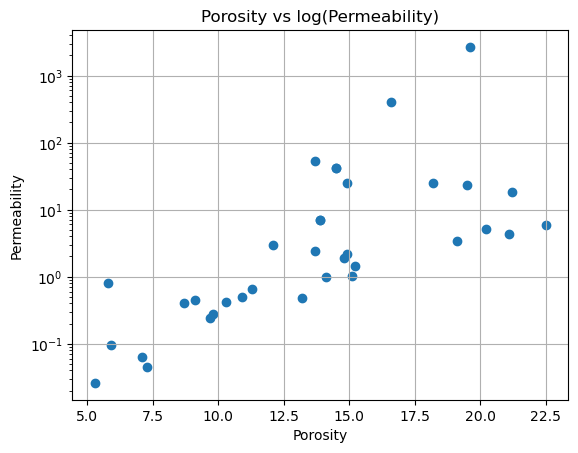

In [8]:
plt.scatter(porosity, permeability)
plt.xlabel('Porosity')
plt.ylabel('Permeability')
plt.title('Porosity vs log(Permeability)')
plt.yscale('log')
plt.grid()

plt.show()


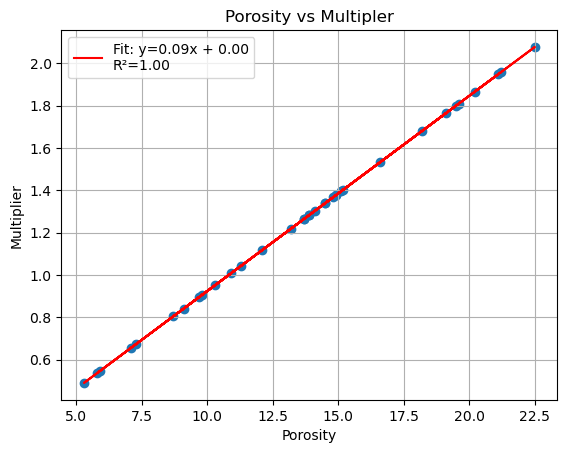

In [9]:
# Assuming porosity and mul are your data arrays

# Perform linear regression using numpy.polyfit
slope, intercept = np.polyfit(porosity, mul, 1)

# Calculate the predicted values
mul_pred = slope * porosity + intercept

# Calculate R²
ss_res = np.sum((mul - mul_pred) ** 2)  # Residual sum of squares
ss_tot = np.sum((mul - np.mean(mul)) ** 2)  # Total sum of squares
r2 = 1 - (ss_res / ss_tot)




plt.scatter(porosity, mul)
# Plot the regression line
plt.plot(porosity, mul_pred, color='red', label=f'Fit: y={slope:.2f}x + {intercept:.2f}\nR²={r2:.2f}')

plt.xlabel('Porosity')
plt.ylabel('Multiplier')
plt.title('Porosity vs Multipler')
#plt.yscale('log')
#plt.xscale('log')
plt.legend()

plt.grid()

plt.show()


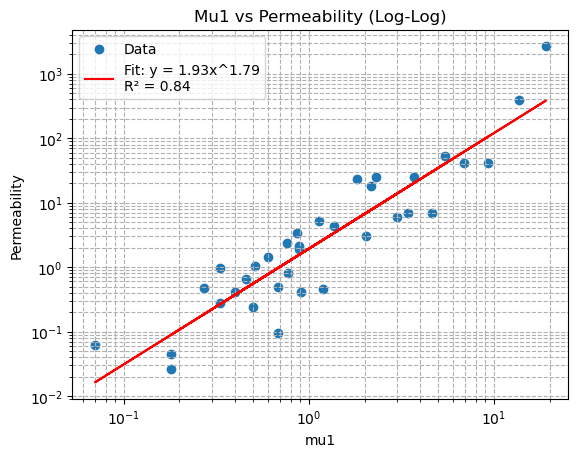

In [10]:

# Log-transform the data for linear regression
log_mu1 = np.log(mu1)
log_perm = np.log(permeability)

# Perform linear regression on the log-transformed data
slope, intercept = np.polyfit(log_mu1, log_perm, 1)

# Calculate the predicted values in log scale
log_perm_pred = slope * log_mu1 + intercept

# Convert the predicted log-permeability back to the original scale
perm_pred = np.exp(log_perm_pred)

# Calculate R² for the log-log regression
ss_res = np.sum((log_perm - log_perm_pred) ** 2)  # Residual sum of squares in log scale
ss_tot = np.sum((log_perm - np.mean(log_perm)) ** 2)  # Total sum of squares in log scale
r2 = 1 - (ss_res / ss_tot)

# Plot the scatter plot in log-log scale
plt.scatter(mu1, permeability, label='Data')

# Plot the regression line in the original scale
plt.plot(mu1, perm_pred, color='red', label=f'Fit: y = {np.exp(intercept):.2f}x^{slope:.2f}\nR² = {r2:.2f}')

# Add labels, title, and grid
plt.xlabel('mu1')
plt.ylabel('Permeability')
plt.title('Mu1 vs Permeability (Log-Log)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', ls='--')

# Add legend for the regression equation and R²
plt.legend()

# Show the plot
plt.show()


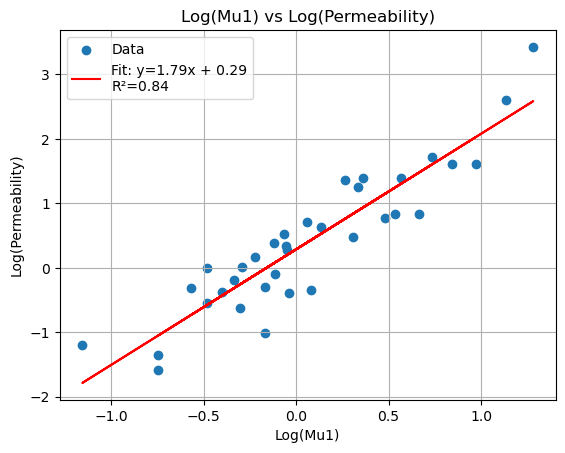

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming lmu1 and lperm are the log-transformed data arrays for mu1 and permeability

# Perform linear regression using numpy.polyfit
slope, intercept = np.polyfit(lmu1, lperm, 1)

# Calculate the predicted values for lperm
lperm_pred = slope * lmu1 + intercept

# Calculate R² correctly
ss_res = np.sum((lperm - lperm_pred) ** 2)  # Residual sum of squares
ss_tot = np.sum((lperm - np.mean(lperm)) ** 2)  # Total sum of squares
r2 = 1 - (ss_res / ss_tot)

# Plot the scatter plot and the regression line
plt.scatter(lmu1, lperm, label='Data')

# Plot the regression line (on the log-log scale)
plt.plot(lmu1, lperm_pred, color='red', label=f'Fit: y={slope:.2f}x + {intercept:.2f}\nR²={r2:.2f}')

# Add labels, title, and grid
plt.xlabel('Log(Mu1)')
plt.ylabel('Log(Permeability)')
plt.title('Log(Mu1) vs Log(Permeability)')

plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()


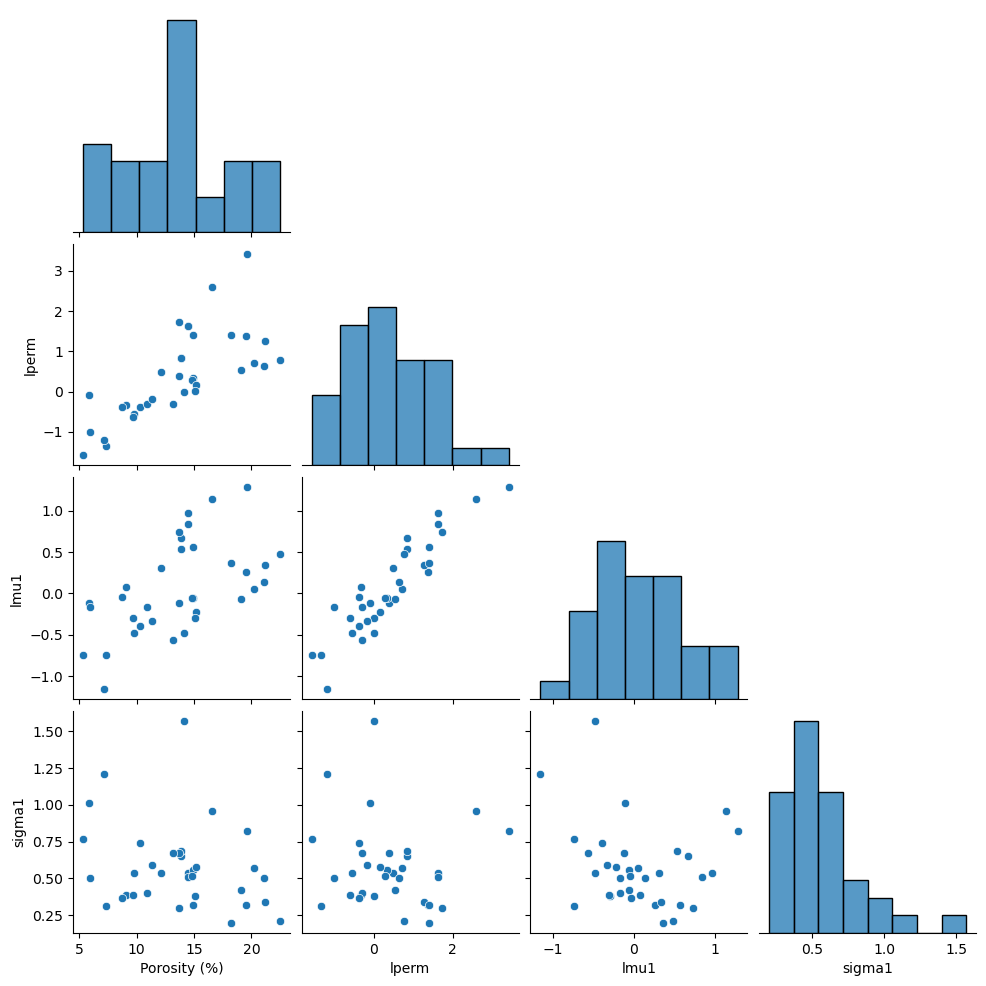

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new DataFrame with the columns of interest
data_to_plot = df[['Porosity (%)', 'lperm',  'lmu1', 'sigma1']]

# Create a pairplot of all the selected data
sns.pairplot(data_to_plot, corner=True)

# Show the plot
plt.show()


# First Attempt at a Perm Model (very bad):

Try something else. 

In [16]:
import numpy as np
from scipy.optimize import curve_fit

# Define the Laplacian-like model for log-transformed permeability
def laplacian_perm_model(inputs, C, a, b):
    mu1, sigma1 = inputs
    return C * np.exp(a * (-np.abs(P_avg - mu1) / (b * sigma1)))

# Example data: mu1 and sigma1 values
mu1_data = df['mu1 (microns)'].values
sigma1_data = df['sigma1'].values
perm_data = df['Permeability (mD)'].values

# Log-transform permeability
log_perm_data = np.log(perm_data)

# Use the median instead of the mean for P_avg
P_avg = np.median(perm_data)

# Combine mu1 and sigma1 into a single input array for curve_fit
inputs = np.vstack((mu1_data, sigma1_data))

# Initial guess for the parameters (C, a, b)
initial_guess = [1, 0.5, 0.5]

# Set bounds for C, a, and b to avoid extreme values
param_bounds = ([0, 0, 0], [np.inf, np.inf, np.inf])  # All parameters must be positive

# Modify the input to pass as a tuple to curve_fit
def wrapper_func(inputs_flat, C, a, b):
    mu1, sigma1 = inputs_flat[0], inputs_flat[1]
    return laplacian_perm_model((mu1, sigma1), C, a, b)

# Flatten the inputs and call curve_fit
params, covariance = curve_fit(wrapper_func, inputs, log_perm_data, p0=initial_guess, bounds=param_bounds)

# Extract fitted parameters
C, a, b = params
print(f"Fitted parameters: C={C}, a={a}, b={b}")

# Predict permeability and convert back to original scale
log_perm_pred = laplacian_perm_model(inputs, C, a, b)
perm_pred = np.exp(log_perm_pred)

# Compare predicted and actual permeability
print(f"Predicted Permeability: {perm_pred}")


Fitted parameters: C=2.987613362624673, a=0.5557870877600039, b=0.47696210584069904
Predicted Permeability: [ 2.45552872  1.00000057  1.0000565   1.03766081  1.4105486  10.03450218
 17.93860634  2.15578545  1.29918773  3.4789579   1.0270876   1.44962292
  1.58889192  1.23152839  1.08445961  1.18948498  1.1389077   1.01914469
  1.00175146  1.16100003  1.20555543  1.18491999  1.04088876  1.05927625
  1.82389156  1.09957217  1.10963473  1.00000842  1.1180929   1.06002821
  1.01185943  1.49065416  1.00000275  1.          1.02117628]


In [17]:
# Predict permeability using the fitted model
predicted_perm = laplacian_perm_model(inputs, C, a, b)

# Store the predicted permeability
df['predicted_permeability'] = predicted_perm


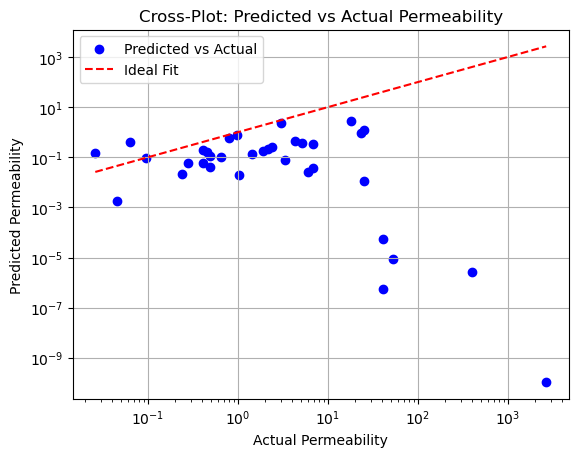

In [18]:
df['permeability'] = df['Permeability (mD)']


# Plot Predicted Permeability vs. Actual Permeability
plt.scatter(df['permeability'], df['predicted_permeability'], c='blue', label='Predicted vs Actual')
plt.plot([min(df['permeability']), max(df['permeability'])],
         [min(df['permeability']), max(df['permeability'])], 'r--', label='Ideal Fit')

plt.xlabel('Actual Permeability')
plt.ylabel('Predicted Permeability')
plt.title('Cross-Plot: Predicted vs Actual Permeability')
plt.yscale('log')
plt.xscale('log')

plt.legend()
plt.grid(True)
plt.show()